# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure S3

## Panel a

### FYN-SH3

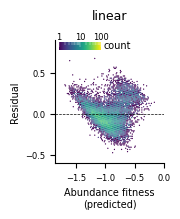

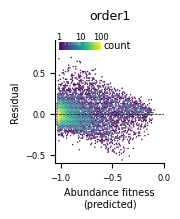

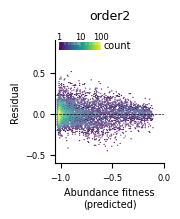

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

for model_name in ['linear', 'order1', 'order2']:
    predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_'+model_name+'/task_1/predictions/predicted_phenotypes_all.txt',
                                      sep='\t', lineterminator='\n')
    
    RT=303*0.001987
    predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].mean(axis=1)
    predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].std(axis=1)
    
    predicted_phenotypes['mean']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].mean(axis=1)
    predicted_phenotypes['std']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].std(axis=1)
    
    predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
    predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT
    
    for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
        predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
        predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT


    # Normalize data in the -1 to 0 range
    
    def normalize(values, bounds):
        return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
    
    predicted_phenotypes_scaled = predicted_phenotypes.copy()
    
    reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']
    
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
    
    predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    
    
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
    
    predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})

    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
    model = LinearRegression()
    model.fit(x,y)
    y_pred = model.predict(x)
    
    residual = (y - y_pred)
    
    fig, ax = plt.subplots(figsize=(1.4,1.6))
    hbin=ax.hexbin(x=predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy(),y=residual,bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
    
    plt.axhline(0, ls='--', color='black', lw=0.5)
    plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
    plt.xticks(fontsize=6)
    plt.ylabel('Residual', fontsize=7)
    plt.yticks(fontsize=6)
    plt.title(model_name, y=1.1,fontsize=9)
    ax.set_xticks(np.arange(-1.5,0.5,0.5))
    ax.set_ylim(-0.6,0.9)
    if model_name == 'linear':
        ax.set_xlim(-1.85,0)
    else:
        ax.set_xlim(-1.05,0)
    ax.spines[['top','right']].set_visible(False)
    ax.set_rasterization_zorder(0)
    fmt = '%1.f'
    cax=fig.add_axes([0.15,0.82,0.3,0.05])
    cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
    cb.outline.set_visible(False)
    cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
    cb.ax.xaxis.set_tick_params(pad=0)
    cb.set_ticks([1,10,100])
    cb.set_ticklabels([1,10,100], fontsize=6)
    ax1 = cb.ax
    ax1.text(140,0.1,'count',rotation=0, fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'

### CI-2A

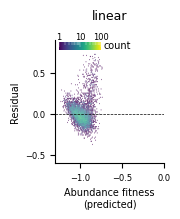

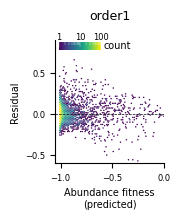

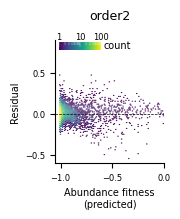

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

for model_name in ['linear', 'order1', 'order2']:
    predicted_phenotypes = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_'+model_name+'/task_1/predictions/predicted_phenotypes_all.txt',
                                      sep='\t', lineterminator='\n')
    
    RT=303*0.001987
    predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].mean(axis=1)
    predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].std(axis=1)
    
    predicted_phenotypes['mean']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].mean(axis=1)
    predicted_phenotypes['std']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].std(axis=1)
    
    predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
    predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT
    
    for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
        predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
        predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT


    # Normalize data in the -1 to 0 range
    
    def normalize(values, bounds):
        return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
    
    predicted_phenotypes_scaled = predicted_phenotypes.copy()
    
    reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']
    
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
    
    predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    
    
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
    
    predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})

    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
    model = LinearRegression()
    model.fit(x,y)
    y_pred = model.predict(x)
    
    residual = (y - y_pred)
    
    fig, ax = plt.subplots(figsize=(1.4,1.6))
    hbin=ax.hexbin(x=predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy(),y=residual,bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
    
    plt.axhline(0, ls='--', color='black', lw=0.5)
    plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
    plt.xticks(fontsize=6)
    plt.ylabel('Residual', fontsize=7)
    plt.yticks(fontsize=6)
    plt.title(model_name, y=1.1,fontsize=9)
    ax.set_xticks(np.arange(-1.5,0.5,0.5))
    ax.set_ylim(-0.6,0.9)
    if model_name == 'linear':
        ax.set_xlim(-1.3,0)
    else:
        ax.set_xlim(-1.05,0)
    ax.spines[['top','right']].set_visible(False)
    ax.set_rasterization_zorder(0)
    fmt = '%1.f'
    cax=fig.add_axes([0.15,0.82,0.3,0.05])
    cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
    cb.outline.set_visible(False)
    cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
    cb.ax.xaxis.set_tick_params(pad=0)
    cb.set_ticks([1,10,100])
    cb.set_ticklabels([1,10,100], fontsize=6)
    ax1 = cb.ax
    ax1.text(140,0.1,'count',rotation=0, fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'

## Panel b

### FYN-SH3

In [4]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order2_sparse_regularized/task_4/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

In [5]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


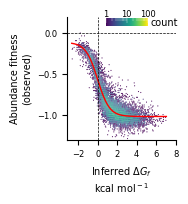

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-2,10,2))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')

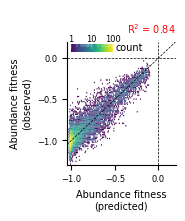

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

fyn_overall_sparse_model_performance=pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
fyn_overall_sparse_model_performance.at['2','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndordersprsreg_performance.svg', dpi=300, transparent=True, bbox_inches='tight')


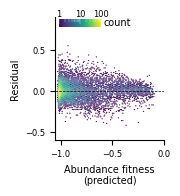

In [8]:
residual = (y - y_pred)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy(),y=residual,bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)

plt.axhline(0, ls='--', color='black', lw=0.5)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Residual', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-0.6,0.9)
ax.set_xlim(-1.05,0)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndordersprsreg_residuals.svg', dpi=300, transparent=True, bbox_inches='tight')

### CI-2A

In [9]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order2_sparse_regularized/task_4/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_'+str(i)+'_additive_trait0' for i in range(1,11,1)]].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_'+str(i) for i in range(1,11,1)]].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

In [10]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


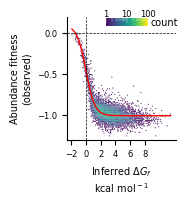

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-2,10,2))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')

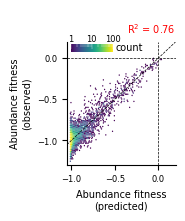

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

fyn_overall_sparse_model_performance=pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
fyn_overall_sparse_model_performance.at['2','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndordersprsreg_performance.svg', dpi=300, transparent=True, bbox_inches='tight')


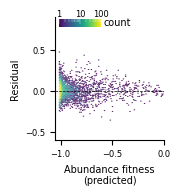

In [13]:
residual = (y - y_pred)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy(),y=residual,bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)

plt.axhline(0, ls='--', color='black', lw=0.5)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Residual', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-0.6,0.9)
ax.set_xlim(-1.05,0)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndordersprsreg_residuals.svg', dpi=300, transparent=True, bbox_inches='tight')